<a href="https://colab.research.google.com/github/Julienmimigo/Midterm_exam/blob/main/Economic_Modelling_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Midterm exam:
@staticmethod
def distance_2_points(p1, p2):
    return ((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2) ** 0.5


Number of rows:
77

Column names:
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

Opening stock value on April 9th:
8.5


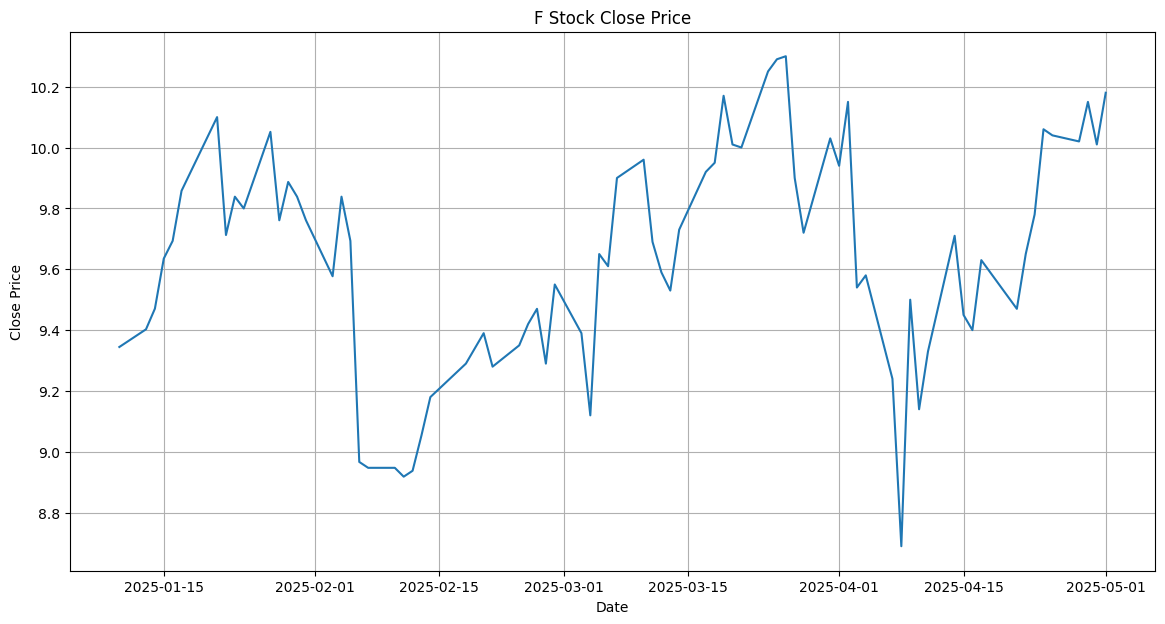

In [15]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download the CSV for ticker "F"
ticker = "F"
url = f"https://raw.githubusercontent.com/itb-ie/midterm_data/refs/heads/main/{ticker}.csv"

with open("company.csv", "w") as f:
    f.write(requests.get(url).text)

# Step 2: This code is to change the csv file to a dataframe in order to read and play around with it more easily
df = pd.read_csv("company.csv", index_col="Date")
df.index = pd.to_datetime(df.index)

# Step 3: Get the basic info (like number of rows, column names and the opening price) using our previously created "variable" (the dataframe resulting from the csv file)
print("Number of rows:")
print(len(df))

print("\nColumn names:")
print(df.columns)

# Step 4: Get the opening price on April 9th
print("\nOpening stock value on April 9th:")
print(df.loc["2025-04-09", "Open"])

# Step 5: plot any column. Here I decided to plot the closing price and use the figure size code to make the figure bigger, as otherwise the dates were too close to each other. ie having a neater graph
plt.figure(figsize=(14,7))
plt.plot(df.index, df["Close"])
plt.title(f"{ticker} Stock Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


In [ ]:
class ColorPoint(Point):
# This code is one example of where we are inheriting from another class. So in
# this case basically colorpoint will inherit all basic features of a 2D point
# that were defined in Point (coordinates and comparison).
class AdvancedPoint(ColorPoint):
# AdvancedPoint inherits from ColorPoint, which already extends Point, so it
# keeps all functionality and adds new ones like color validation and static
# methods (e.g., distance between points).

In [21]:
# Poker simulation setup
import random
import matplotlib.pyplot as plt
from collections import Counter

# Define Card and Deck classes
class Card:
    RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
    SUITS = ["♣", "♦", "♥", "♠"]

    def __init__(self, suit, rank):
        if rank not in self.RANKS:
            raise ValueError("Invalid rank")
        if suit not in self.SUITS:
            raise ValueError("Invalid suit")
        self._suit = suit
        self._rank = rank

    @property
    def suit(self):
        return self._suit

    @property
    def rank(self):
        return self._rank

    def __str__(self):
        return f"{self._rank}{self._suit}"

    def __repr__(self):
        return str(self)

class Deck:
    def __init__(self):
        self._deck = [Card(s, r) for s in Card.SUITS for r in Card.RANKS]

    def shuffle(self):
        random.shuffle(self._deck)

    def deal(self):
        return self._deck.pop(0)

# Define PokerHand class and track Three of a Kind
class PokerHand:
    def __init__(self, deck):
        self._cards = [deck.deal() for _ in range(5)]

    @property
    def cards(self):
        return self._cards

    @property
    def is_three_of_a_kind(self):
        counts = Counter(card.rank for card in self.cards).values()
        return sorted(counts) == [1, 1, 3]


# Add a form field for slider (Colab only)
from google.colab import widgets
from google.colab import output
from google.colab import files
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(
    value=10000,
    min=1000,
    max=50000,
    step=100,
    description='Iterations:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)
display(slider)




IntSlider(value=10000, description='Iterations:', layout=Layout(width='60%'), max=50000, min=1000, step=100, s…

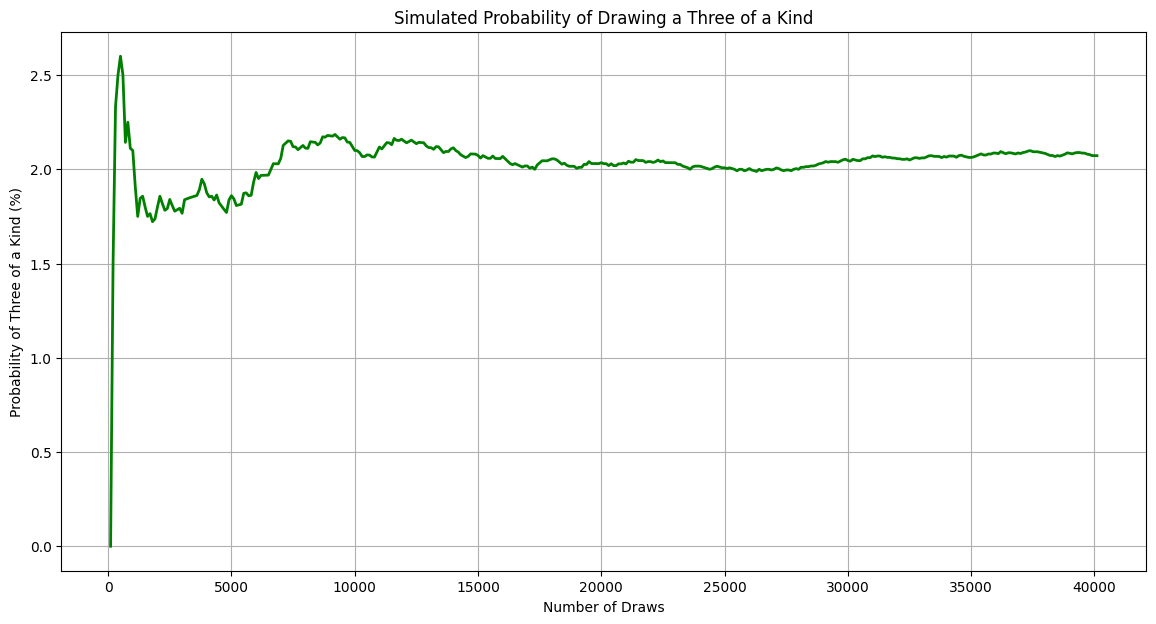

Final Probability after 40100 draws: 2.0723%


In [23]:
# start the simulation :
# Run simulation with selected number of iterations
iterations = slider.value
x_vals = []
y_vals = []

three_kind_count = 0

for i in range(1, iterations + 1):
    deck = Deck()
    deck.shuffle()
    hand = PokerHand(deck)

    if hand.is_three_of_a_kind:
        three_kind_count += 1

    if i % 100 == 0:
        probability = 100 * three_kind_count / i
        x_vals.append(i)
        y_vals.append(probability)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(x_vals, y_vals, color='green', linewidth=2)
plt.xlabel("Number of Draws")
plt.ylabel("Probability of Three of a Kind (%)")
plt.title("Simulated Probability of Drawing a Three of a Kind")
plt.grid(True)
plt.show()

# Final result
print(f"Final Probability after {iterations} draws: {100 * three_kind_count / iterations:.4f}%")

In [24]:
import numpy as np

a = np.arange(0, 12)
a = a.reshape(3, 4)

# Apply the transformation using simple arithmetic
a = a * 2 + a + 1
print(a)


[[ 1  4  7 10]
 [13 16 19 22]
 [25 28 31 34]]


In [ ]:
#A method is a regular function inside a class, like this one:

def shuffle(self):
    random.shuffle(self._deck)
#It does something like shuffle the deck, and you call it like deck.shuffle().

#A magic method is a special method with double underscores, like this one:

def __str__(self):
    return f"{self._rank}{self._suit}"
# This method gets called when you use print(card) or str(card). You don’t
# call it directly — Colab uses it automatically to decide how the object
# should look as a string. for example for a card example in class we also
# used the magic method as it enabled us to print the card nicely: eg 10♠

In [25]:
import numpy as np
import pandas as pd

# Create the DataFrame
df = pd.DataFrame(np.random.randn(4, 4), index=[1, 2, 3, 4], columns=['a', 'b', 'c', 'd'])
print(df)

# Let's choose row with index 3 and column 'b'
row_label = 3
col_name = 'b'

# Access using column first, then row (indexing)
print("Using df['b'][3]:")
print(df['b'][3])  # or df["b"][row_label]

# Access using .loc (label-based)
print("\nUsing df.loc[3, 'b']:")
print(df.loc[3, 'b'])

# Access using .iloc (position-based)
#It is very important that you note that rows and collumns start at 0
# Row 3 is the third row → index 2; column 'b' is second column → index 1
print("\nUsing df.iloc[2, 1]:")
print(df.iloc[2, 1])

#df['b'][3] is column-first, label-based access.
#df.loc[3, 'b'] is fully label-based.
#df.iloc[2, 1] is position-based (rows/cols start from 0).

          a         b         c         d
1 -0.799039  0.739728  0.056213 -1.161412
2  1.119102 -1.349682 -0.780071  1.545091
3 -0.579417  0.371591 -0.126254  0.618678
4 -0.168342 -0.644205  0.215288 -0.771364
Using df['b'][3]:
0.3715906297974729

Using df.loc[3, 'b']:
0.3715906297974729

Using df.iloc[2, 1]:
0.3715906297974729
